In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import probplot

from operator import itemgetter

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set_style('whitegrid')

In [2]:
def get_data():
    columns = ["checking_ac", "duration", "credit_history", "purpose", "amount", "saving_ac",
           "employment_status", "installment_rate", 'personal_status_sex', "debtor_guarantor", "residence_since",
          "property", "age", "installment_plan", "housing", "existing_credits", "job", "liable_count", "telephone",
          "foreign_worker", "target"]
    df = pd.read_csv("./german.data2.csv", delimiter=' ', index_col=False, names=columns)
    
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) < 11:
            cat_cols.append(col)
            df[col]=df[col].astype('category')
    return df

In [3]:
def change_column_dtype(df): 
    num_cols = ["duration", "amount", "age"]
    cat_cols = ["checking_ac", "credit_history", "purpose", "saving_ac", "employment_status", 
                "installment_rate", 'personal_status_sex', "debtor_guarantor", "property",
               "installment_plan", "housing", "existing_credits", "job", "liable_count", "telephone",
              "foreign_worker", "residence_since"]
    for col in cat_cols:
        df[col] = df[col].astype('category')
    for col in num_cols:
        df[col] = df[col].astype('float')
    return df, num_cols, cat_cols

In [4]:
def plot_qq():
    row = 0
    while row < len(num_cols):
        X = df[num_cols[row]].quantile(np.arange(0.1, 1.1, .1))
        Y = X_train[num_cols[row]].quantile(np.arange(0.1, 1.1, .1))
        plt.scatter(X, Y)
        plt.plot(X,X)
        plt.xlabel(num_cols[row] + " original")
        plt.ylabel(num_cols[row] + " after split")
        plt.show()
        row += 1

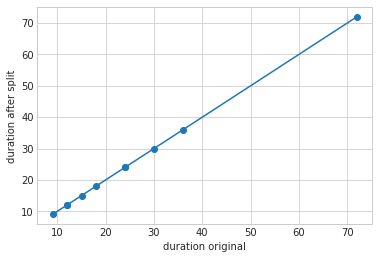

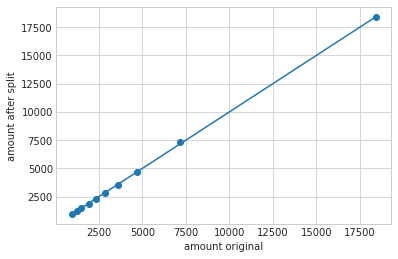

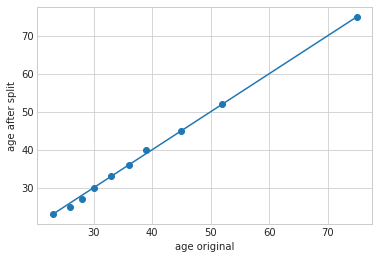

In [5]:
df = get_data()
df, num_cols, cat_cols = change_column_dtype(df)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.target, test_size=0.3, random_state=7)
plot_qq()

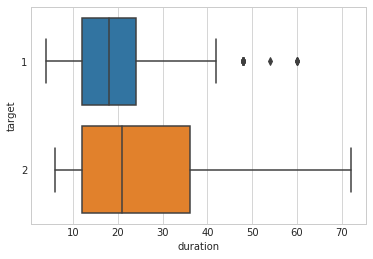

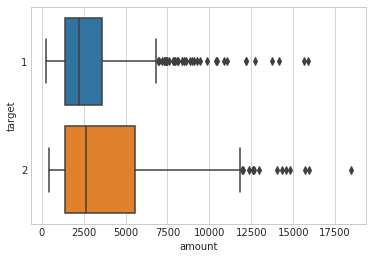

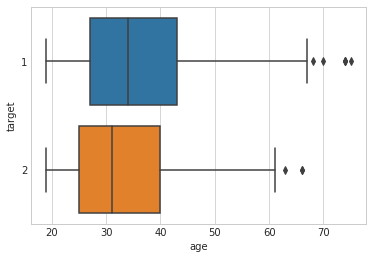

In [6]:
def box_plot(X, Y, num_cols):
    for col in num_cols:
        sns.boxplot(x=X[col], y=Y)
        plt.show()
box_plot(X_train, y_train, num_cols)

In [22]:
temp_df = pd.concat([X_train, y_train], axis=1)

In [27]:
def count_plot(df, col):
    sns.countplot(x=col, hue="target", data=df)
    plt.show()
for col in :
    count_plot(X_train, col)

ValueError: Could not interpret input 'checking_ac'

### Summary

In [48]:
X_train.describe()

,duration,amount,age,checking_ac_A12,checking_ac_A13,checking_ac_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,...,housing_A153,existing_credits_2,existing_credits_3,existing_credits_4,job_A172,job_A173,job_A174,liable_count_2,telephone_A192,foreign_worker_A202
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,20.974286,3293.462857,35.431429,0.265714,0.070000,0.397143,0.051429,0.537143,0.082857,0.290000,...,0.114286,0.312857,0.031429,0.005714,0.197143,0.632857,0.144286,0.164286,0.392857,0.032857
std,12.226612,2920.346151,11.391568,0.442029,0.255329,0.489656,0.221028,0.498975,0.275863,0.454087,...,0.318385,0.463988,0.174598,0.075431,0.398126,0.482371,0.351630,0.370800,0.488735,0.178390
min,4.000000,276.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1370.500000,26.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2319.500000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,3960.500000,42.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,18424.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
def facet_plot(df, cat_cols, num_col):
    for col in cat_cols:
        g = sns.FacetGrid(temp_df, row=col, col="target")
        g_map = g.map(plt.hist, num_col)

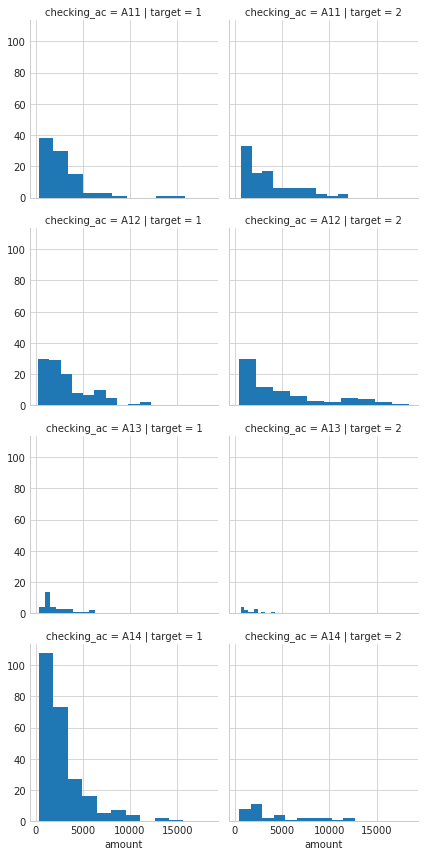

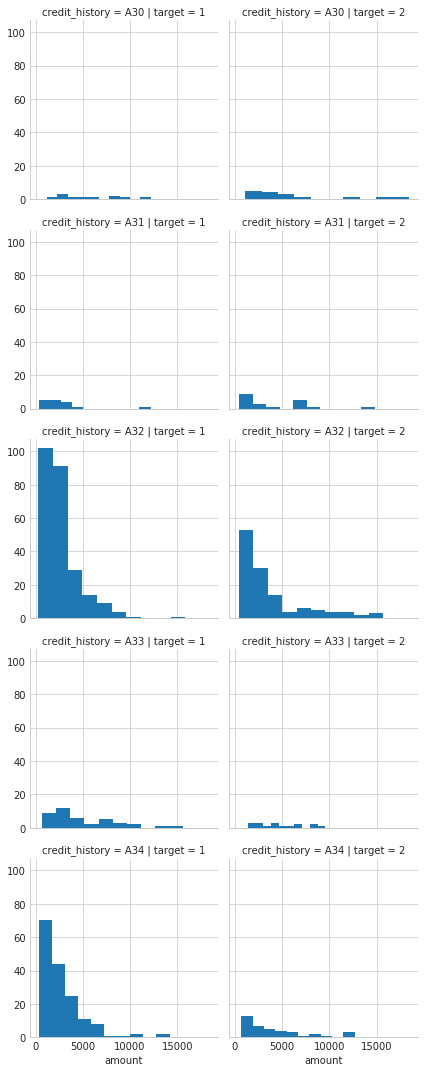

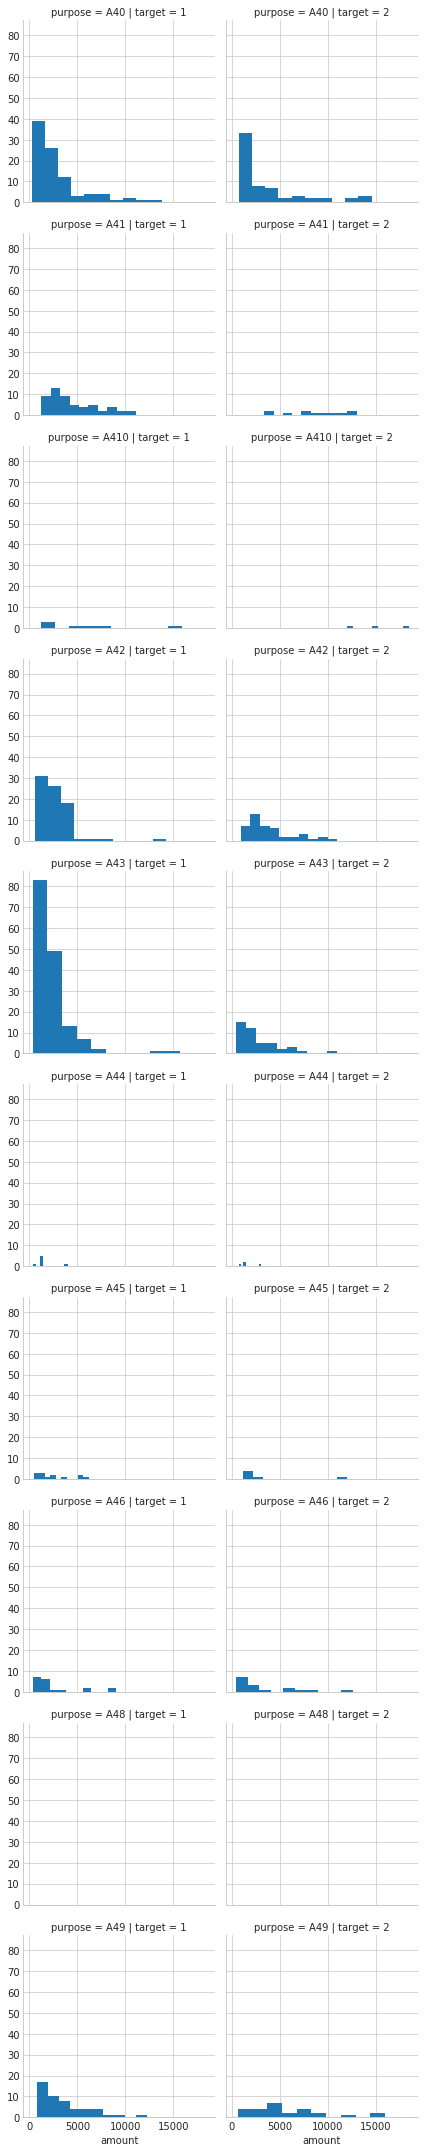

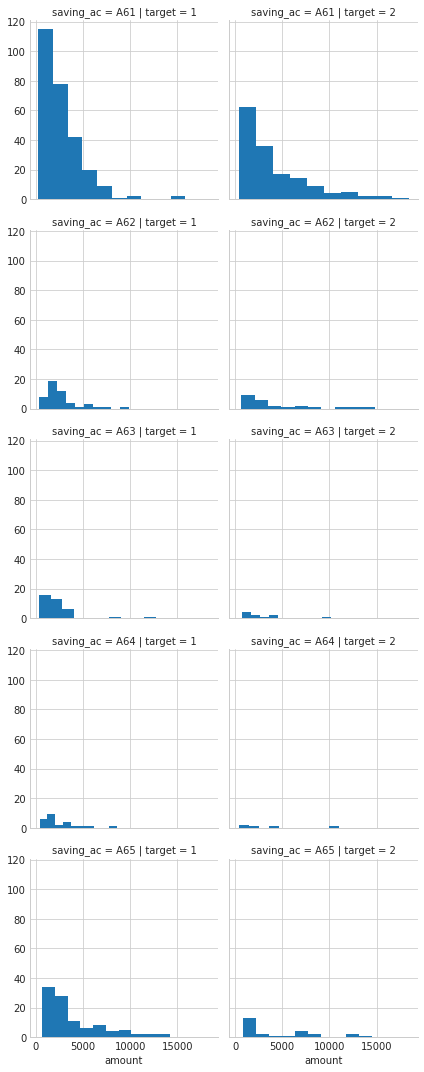

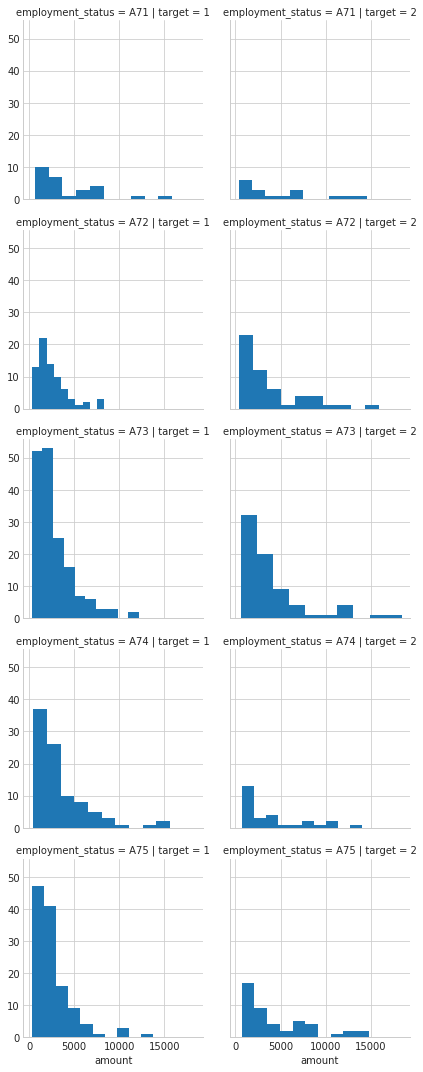

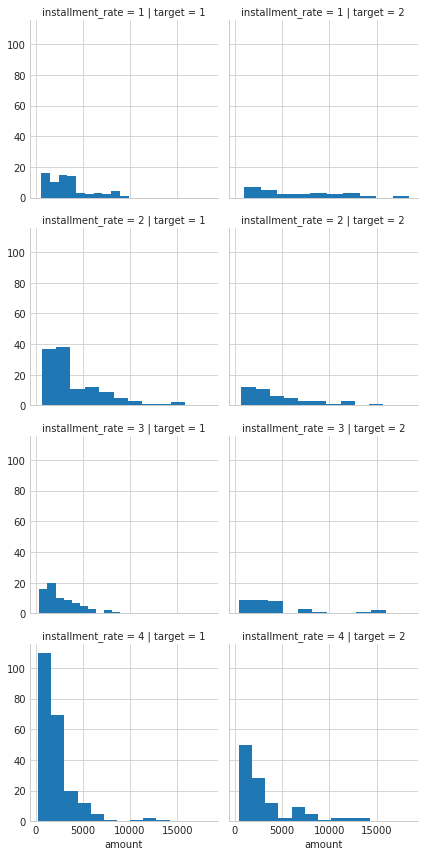

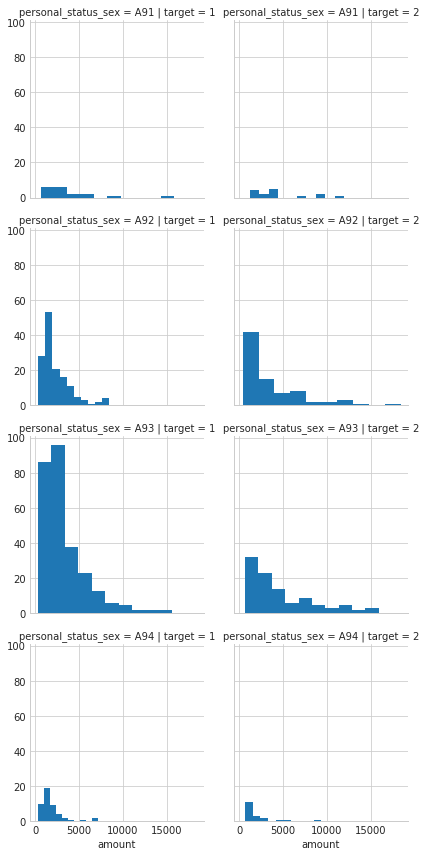

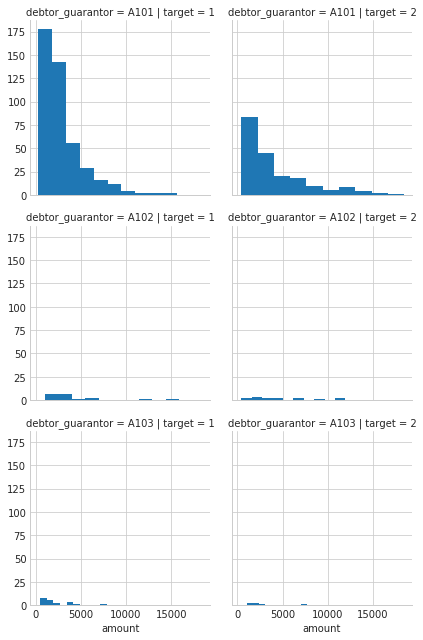

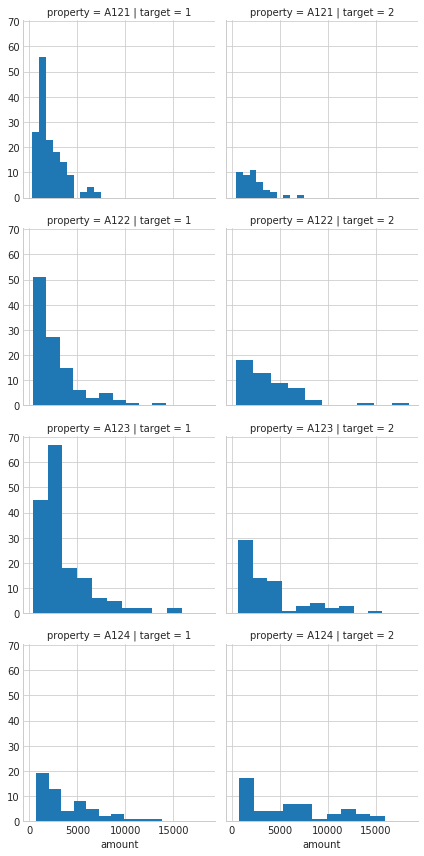

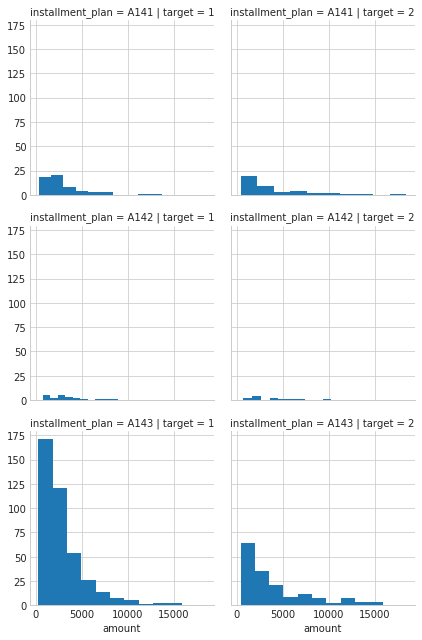

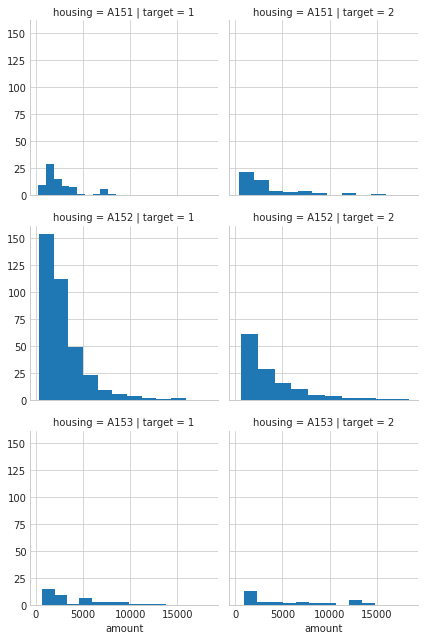

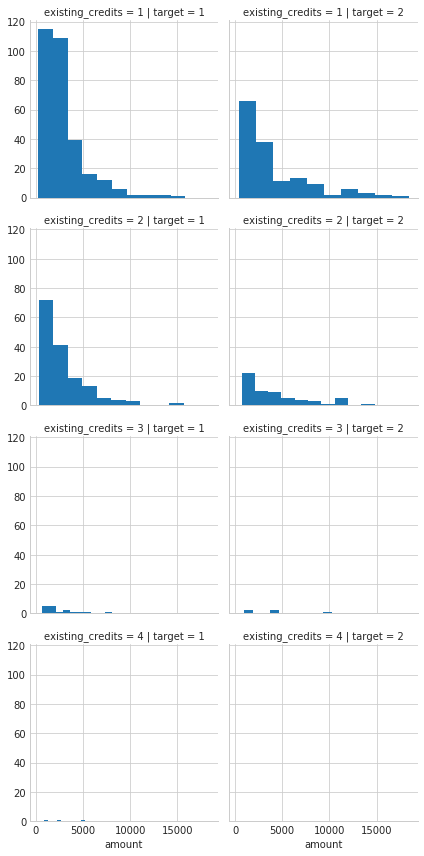

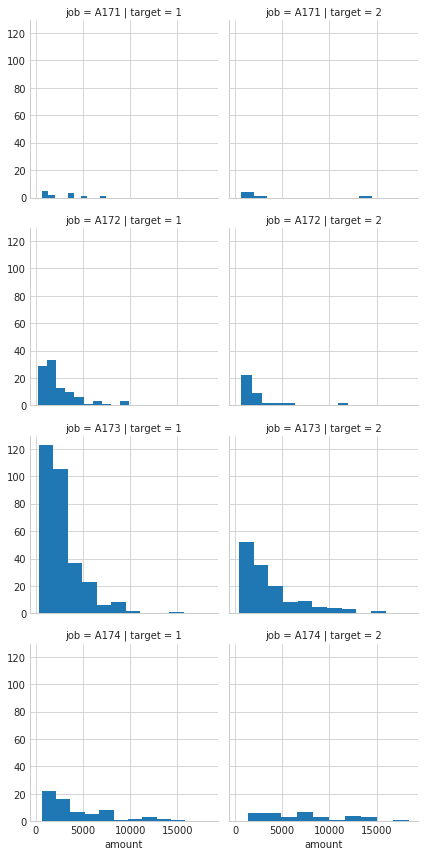

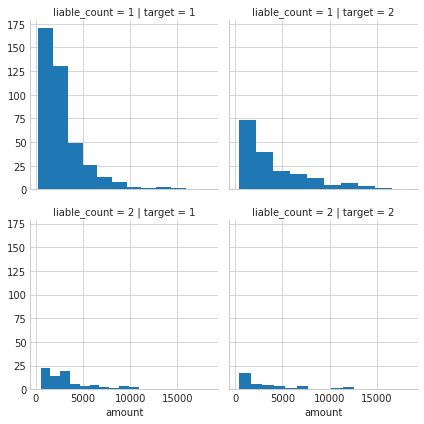

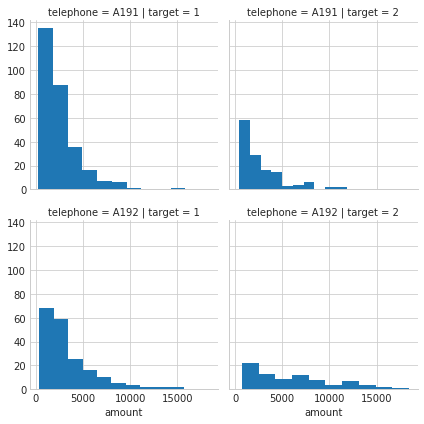

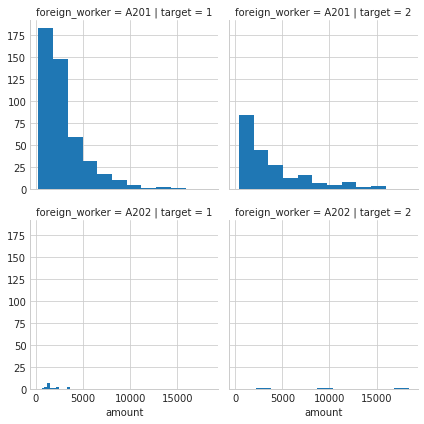

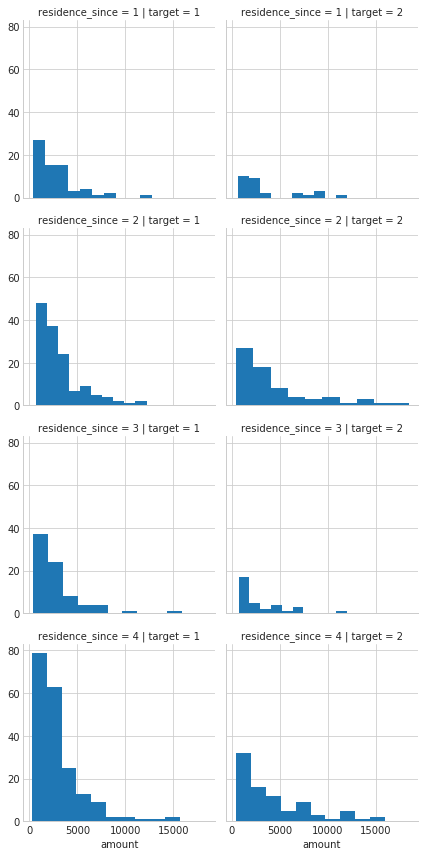

In [11]:
facet_plot(temp_df, cat_cols, "amount")

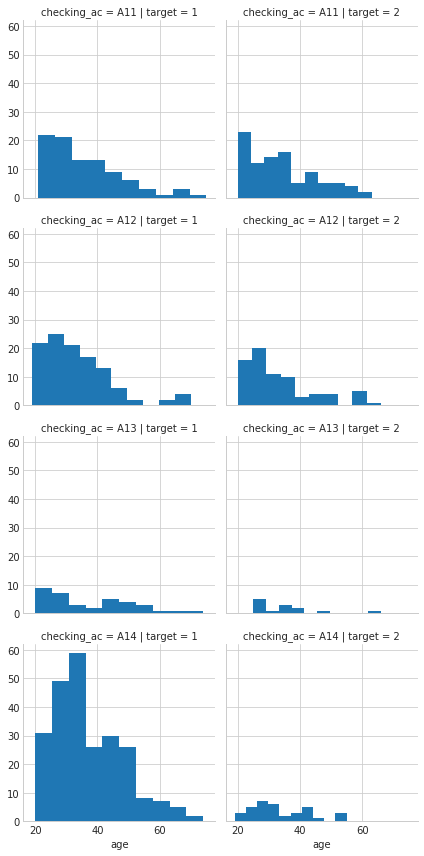

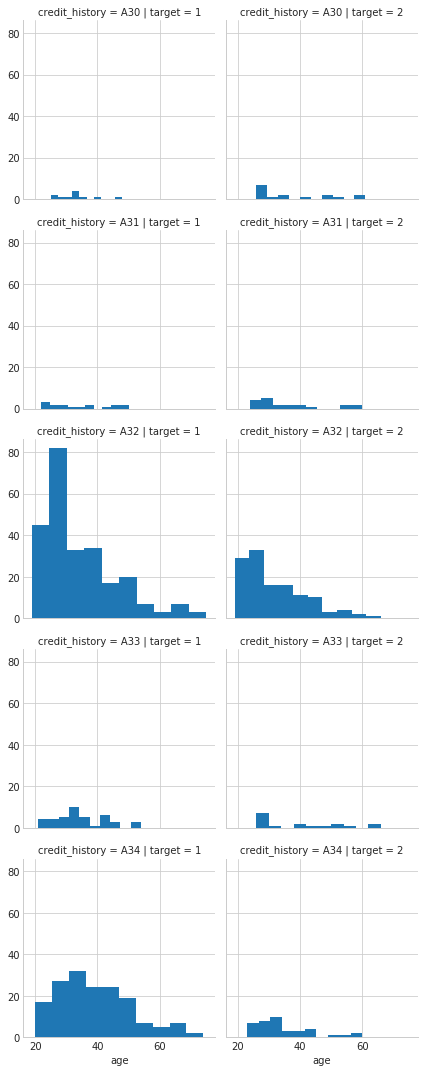

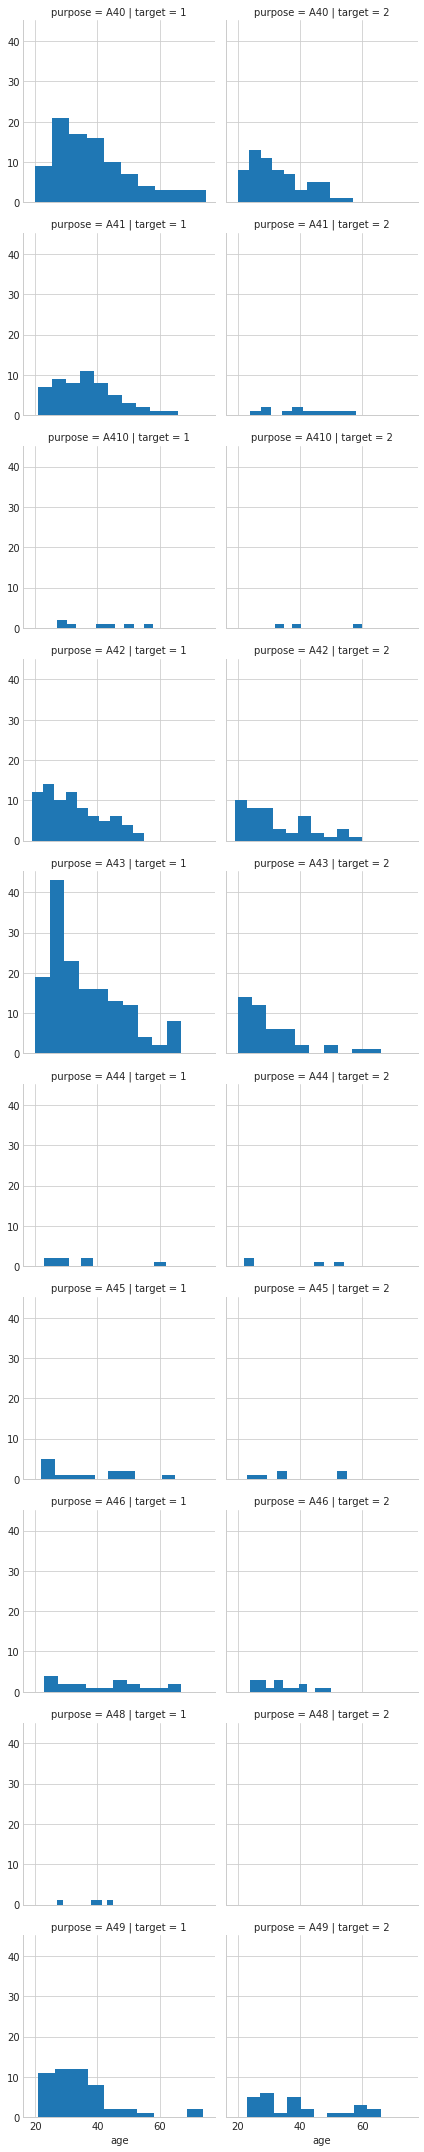

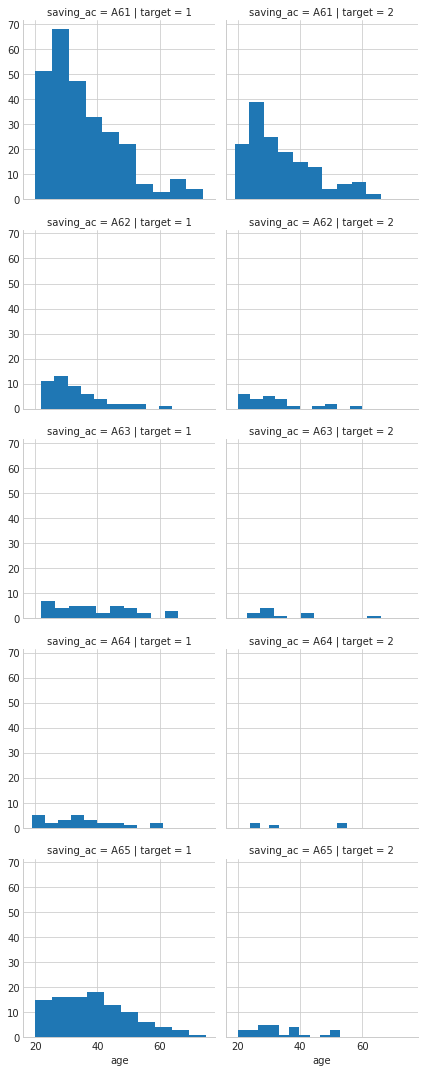

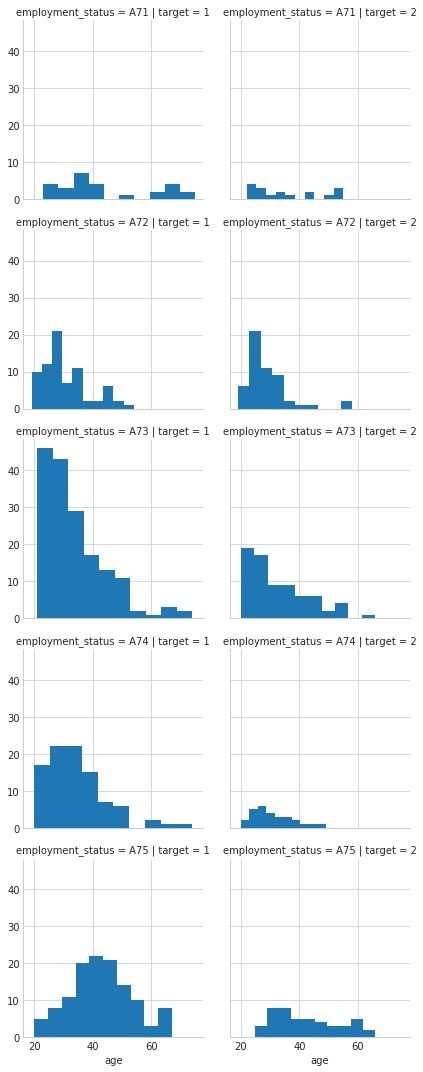

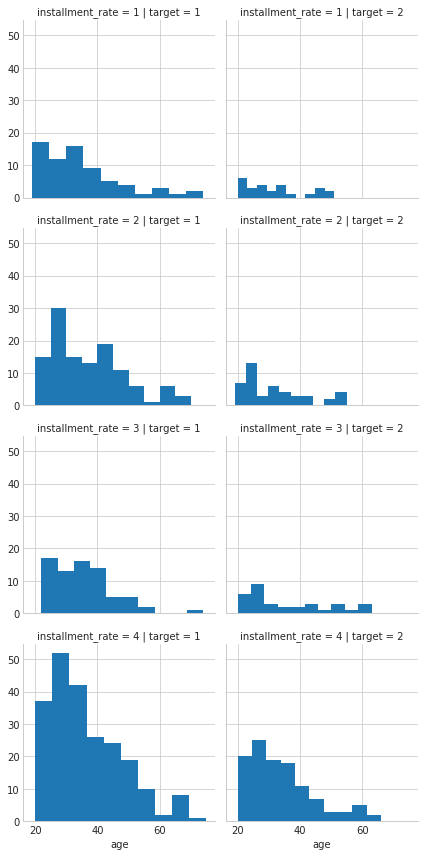

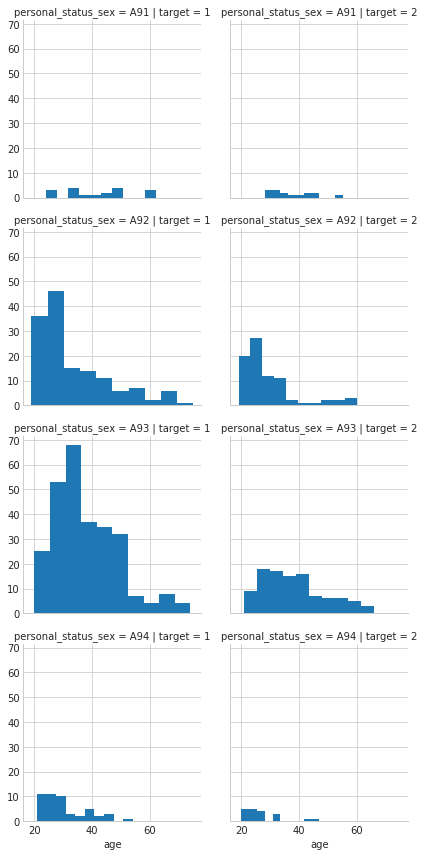

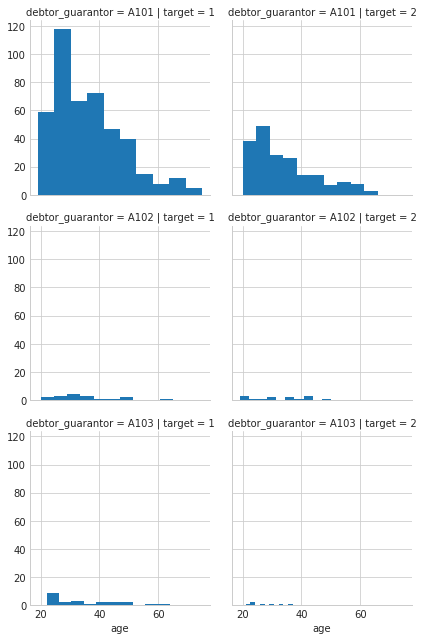

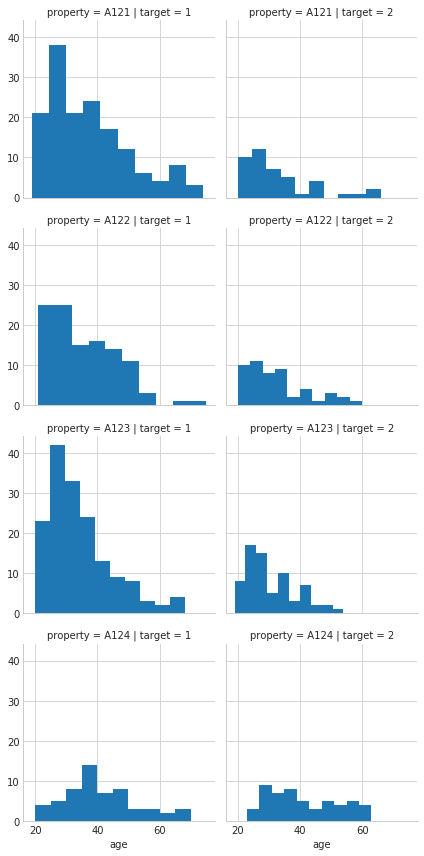

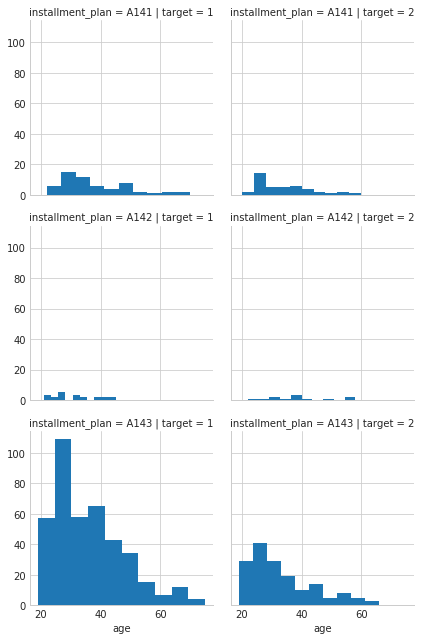

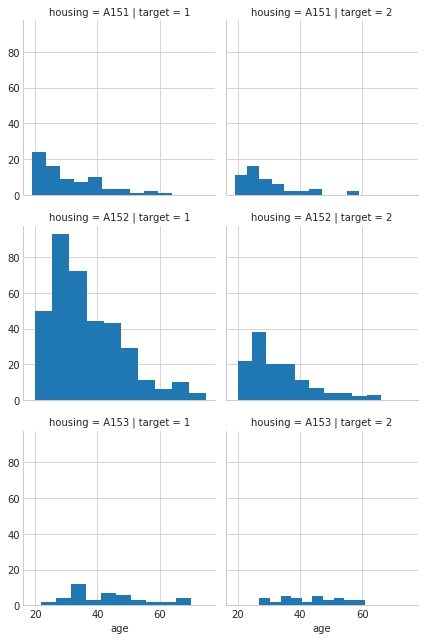

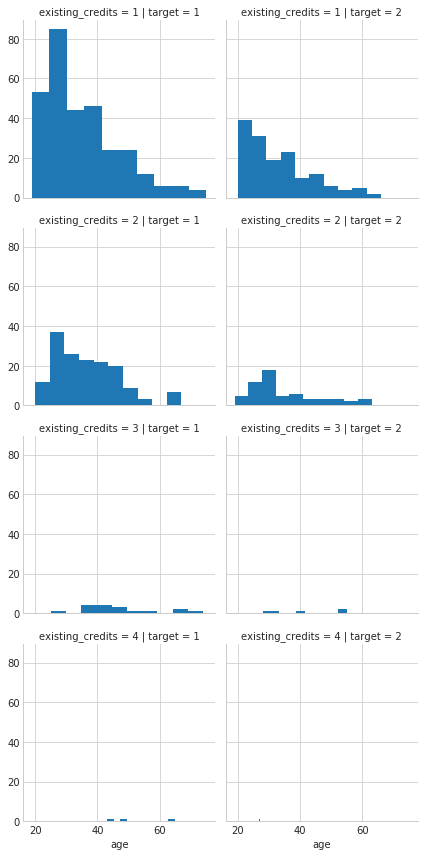

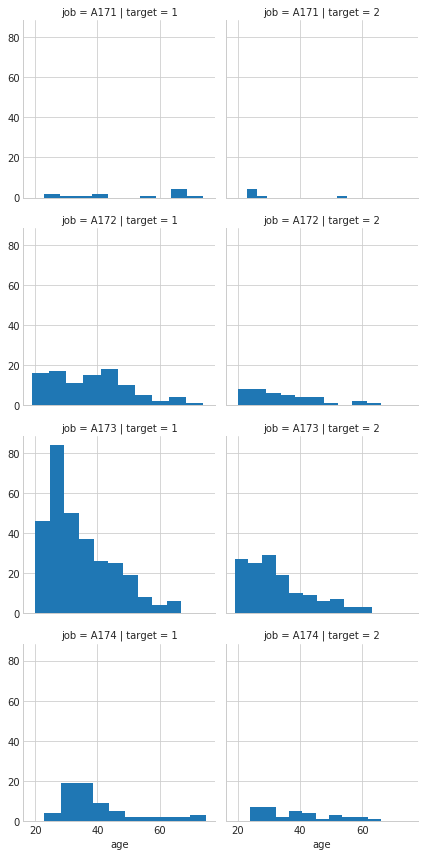

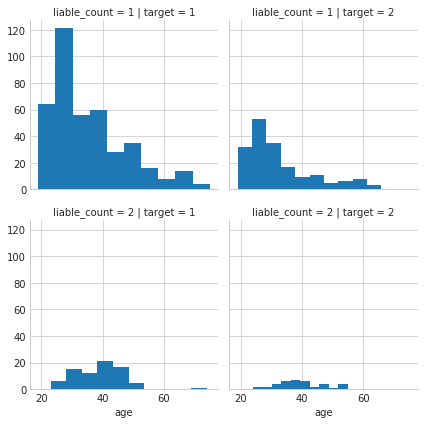

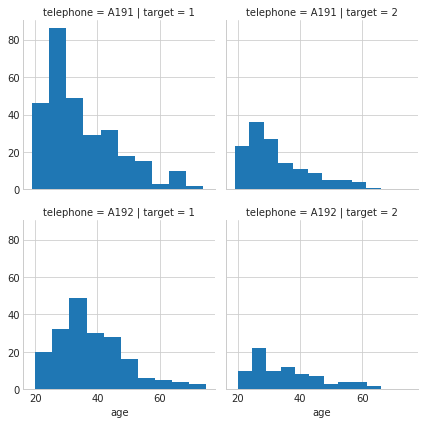

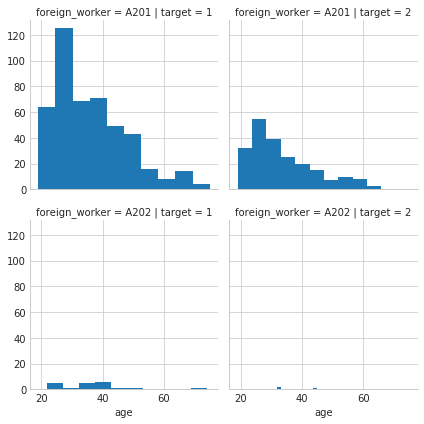

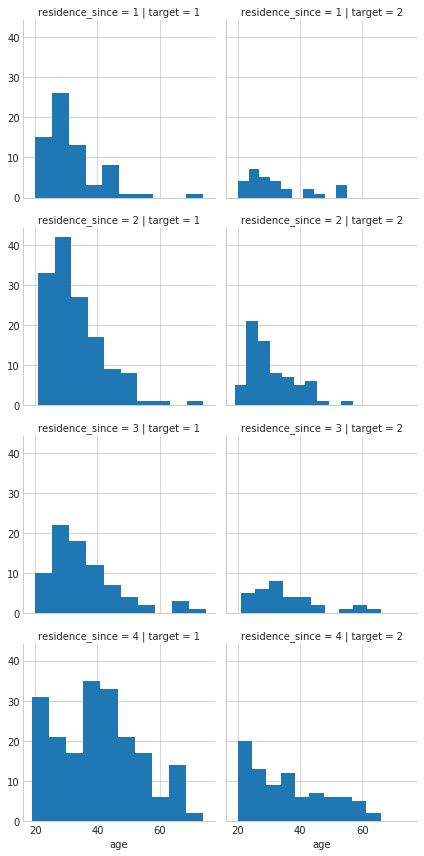

In [12]:
facet_plot(temp_df, cat_cols, "age")

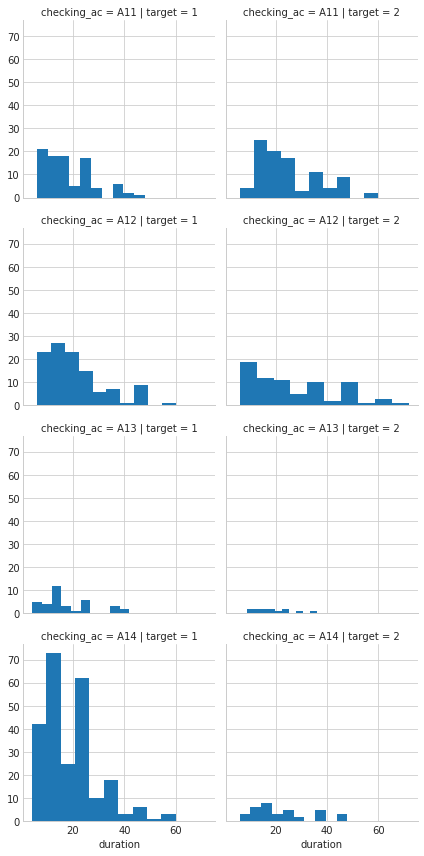

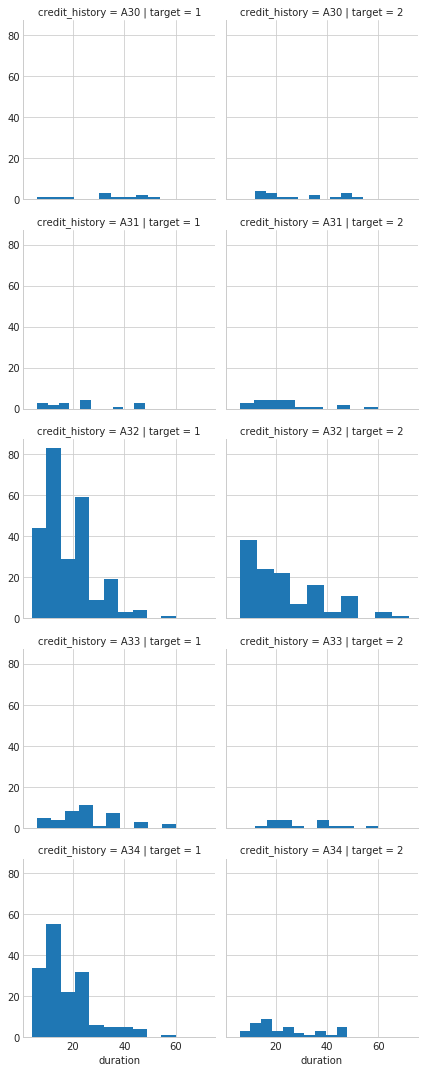

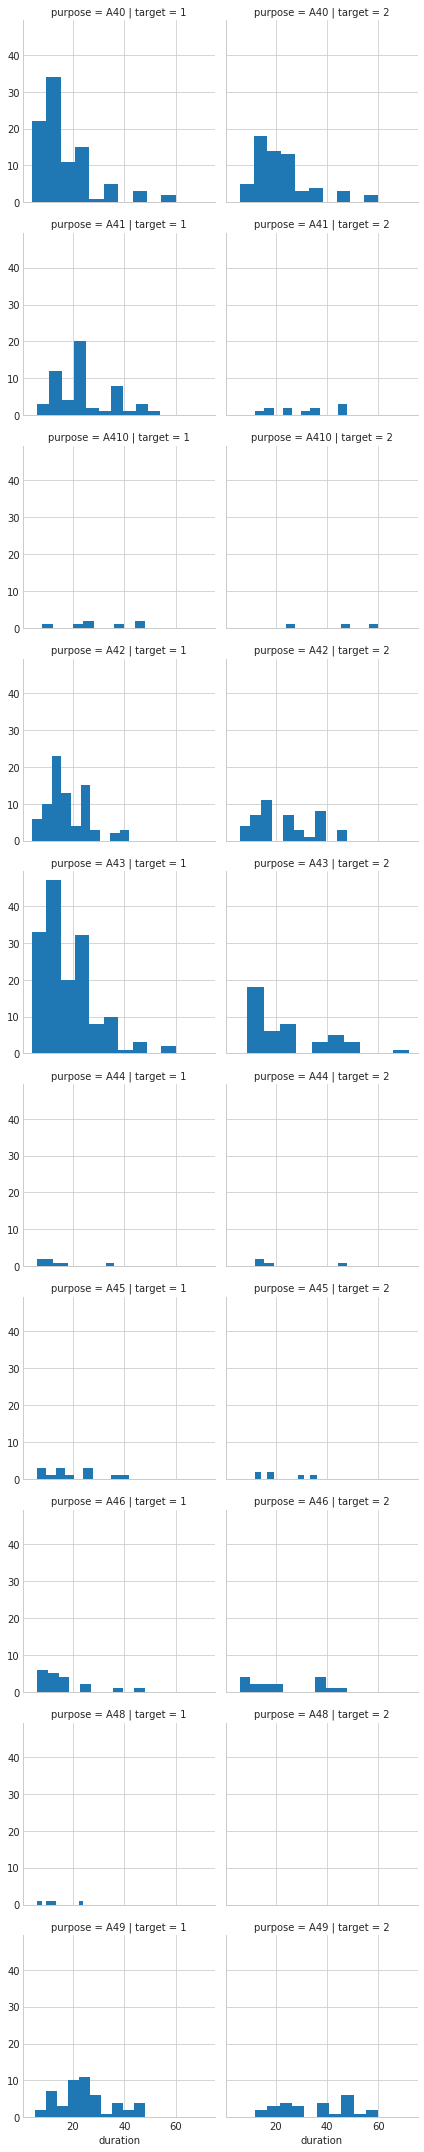

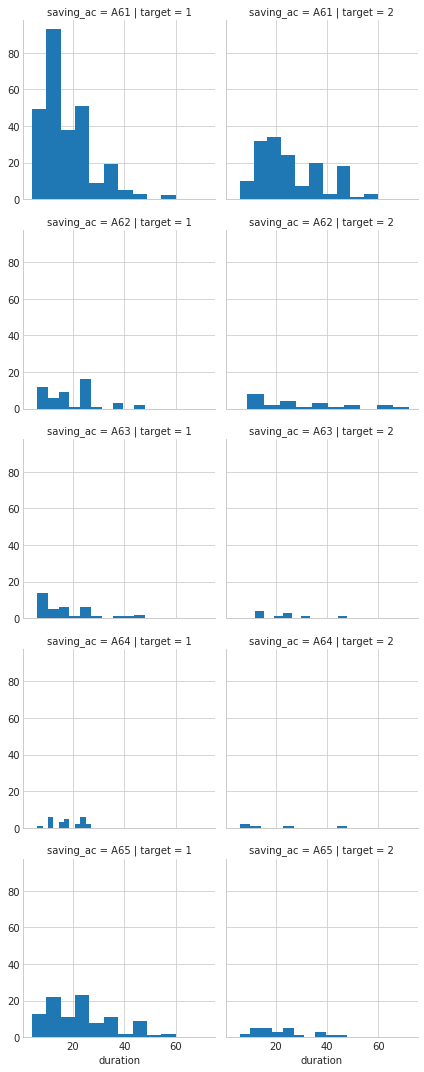

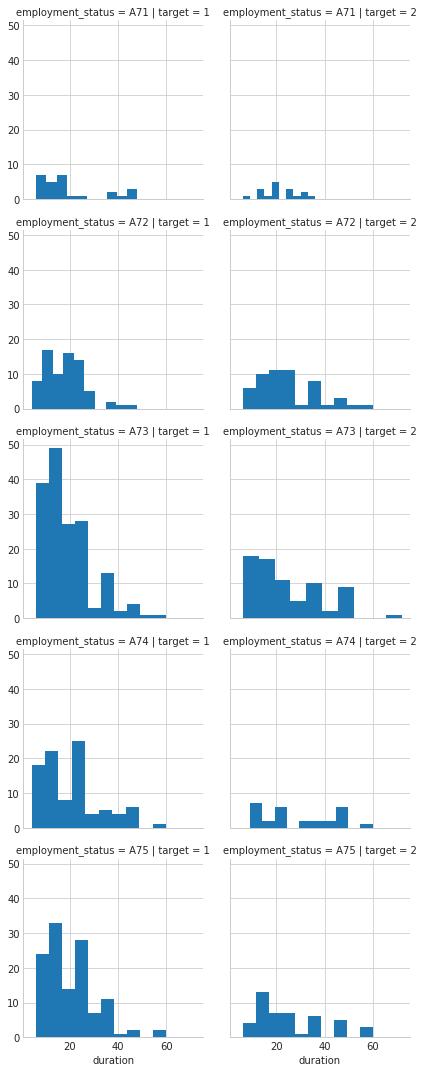

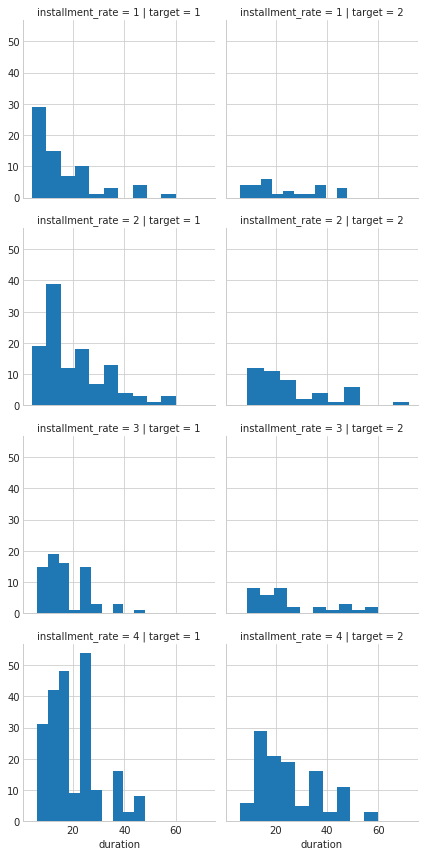

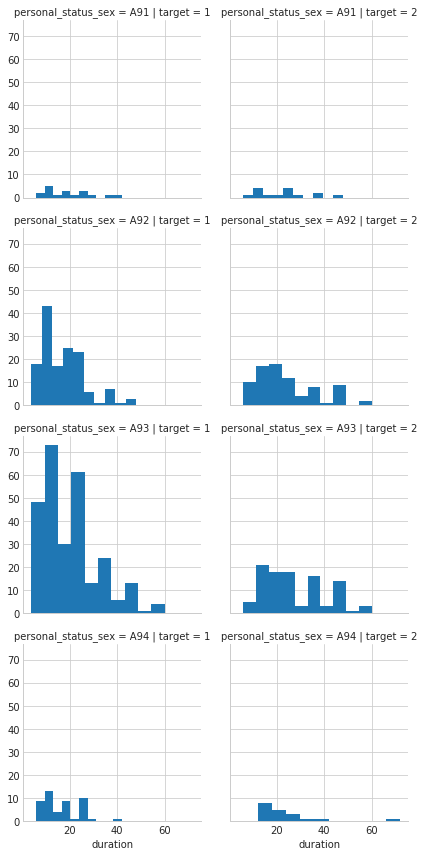

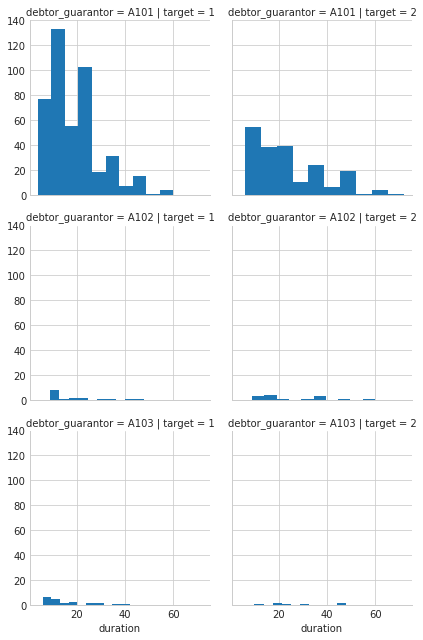

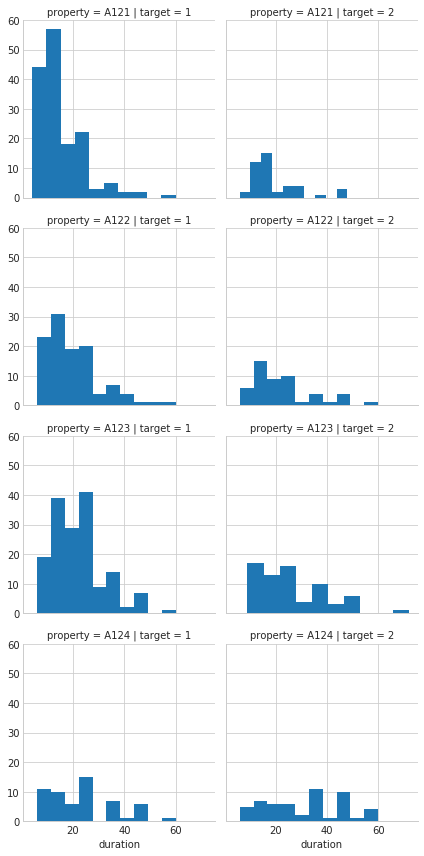

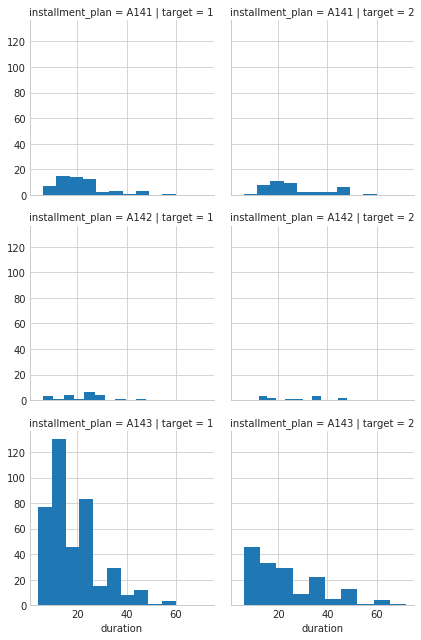

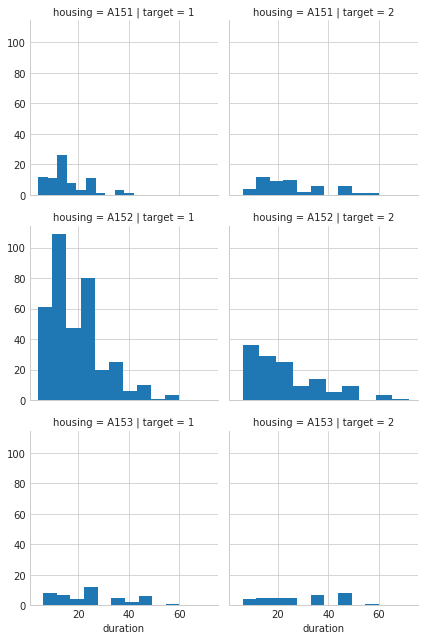

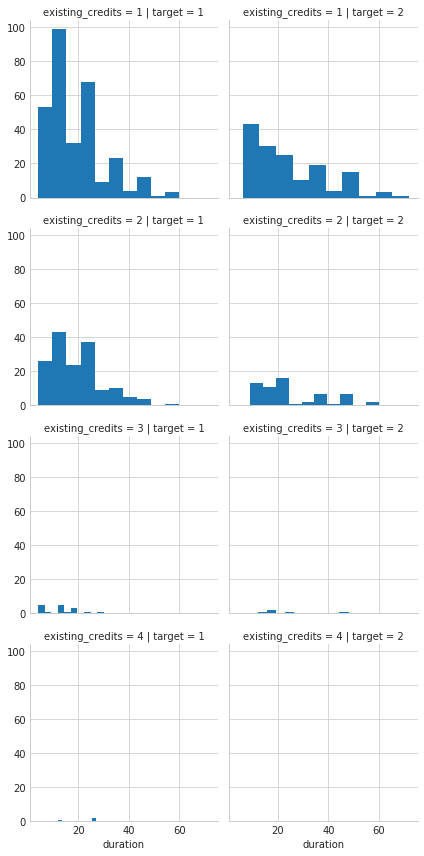

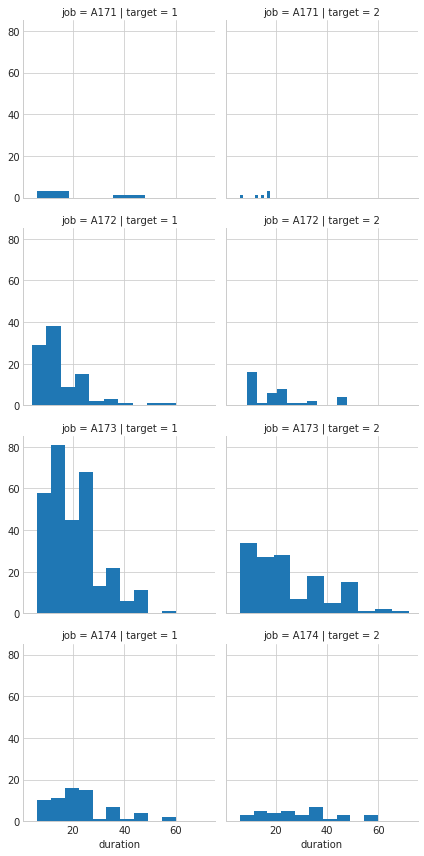

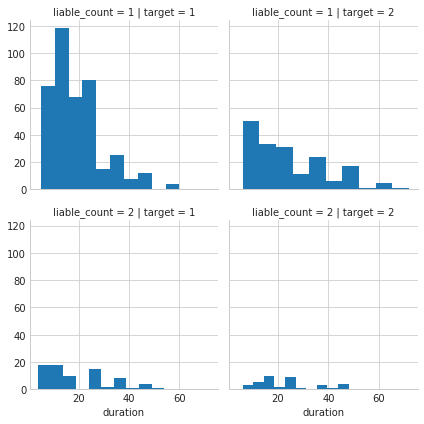

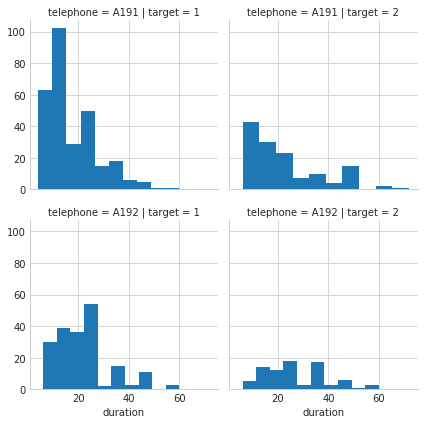

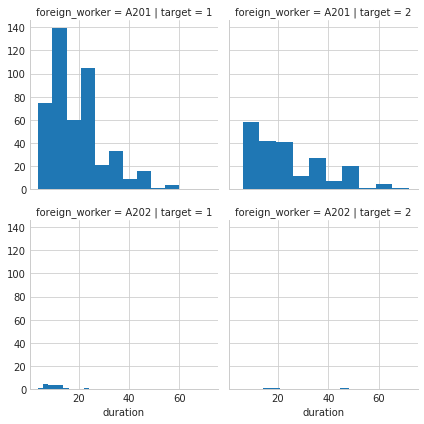

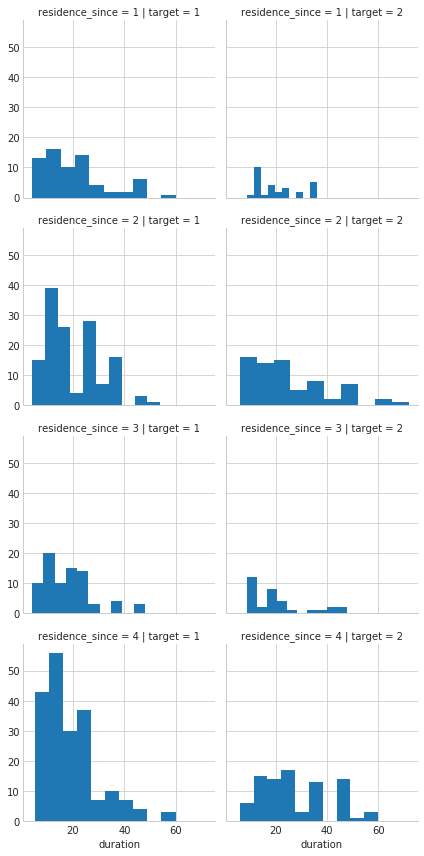

In [13]:
facet_plot(temp_df, cat_cols, "duration")

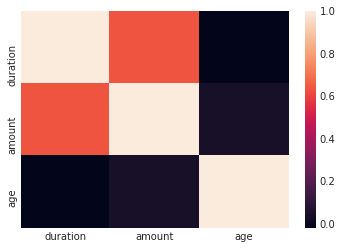

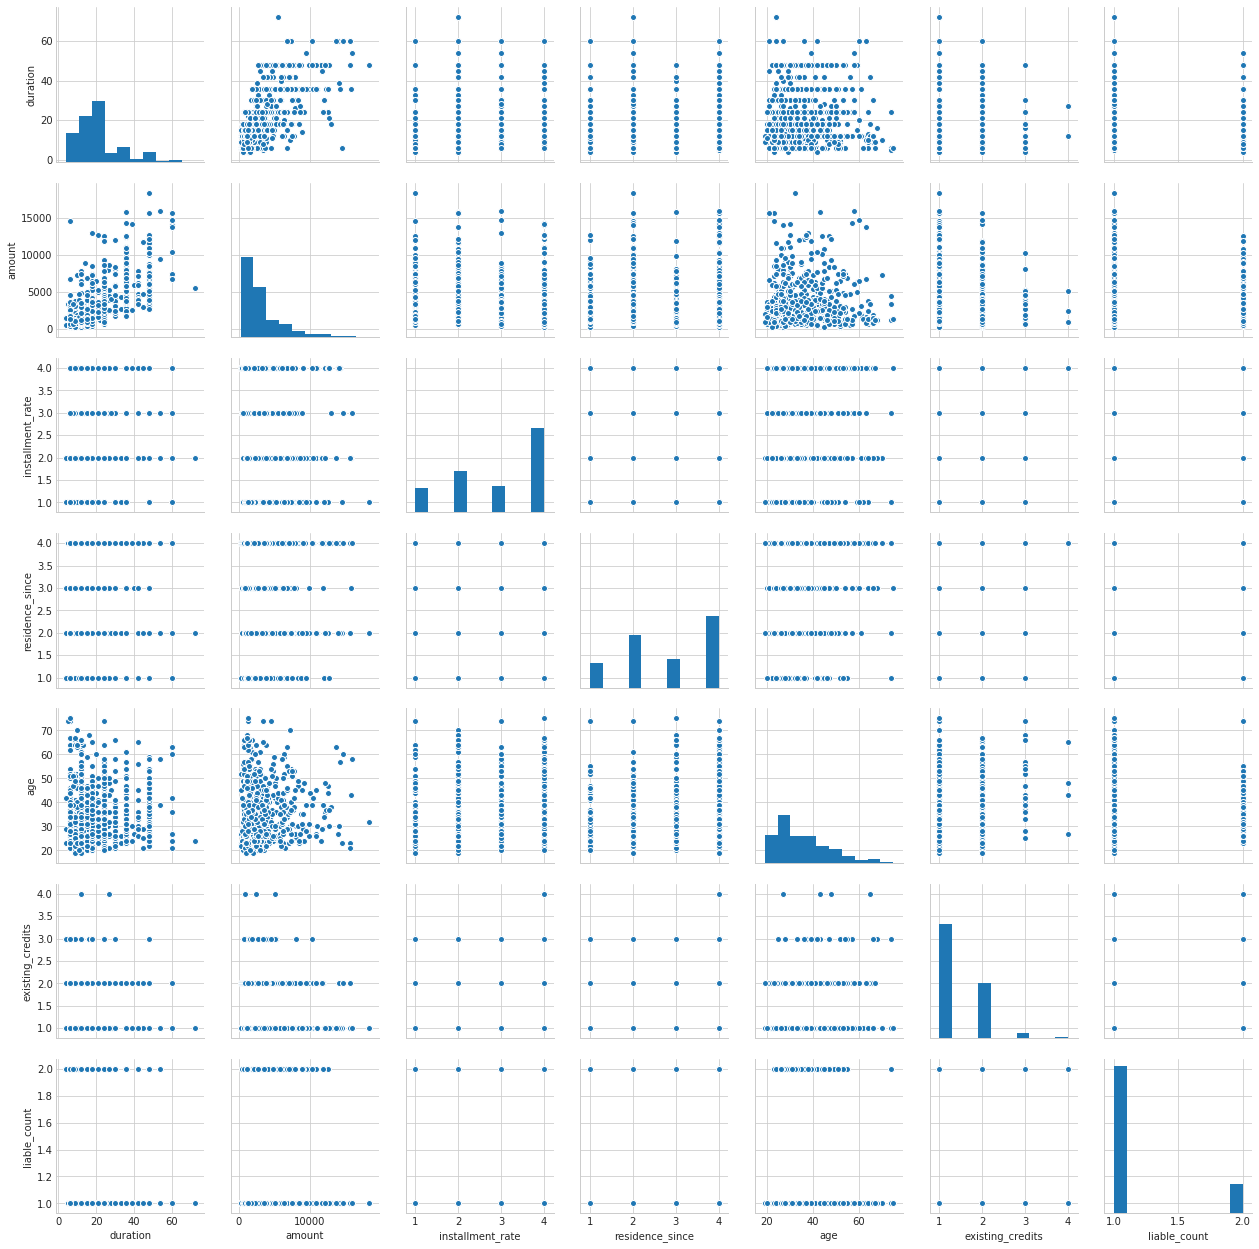

In [15]:
# multivariate

sns.heatmap(X_train.corr())
sns.pairplot(X_train)

# Preprocessing

### 1. Missing values 

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 822 to 175
Data columns (total 20 columns):
checking_ac            700 non-null category
duration               700 non-null float64
credit_history         700 non-null category
purpose                700 non-null category
amount                 700 non-null float64
saving_ac              700 non-null category
employment_status      700 non-null category
installment_rate       700 non-null category
personal_status_sex    700 non-null category
debtor_guarantor       700 non-null category
residence_since        700 non-null category
property               700 non-null category
age                    700 non-null float64
installment_plan       700 non-null category
housing                700 non-null category
existing_credits       700 non-null category
job                    700 non-null category
liable_count           700 non-null category
telephone              700 non-null category
foreign_worker         700 non-null categ

In [36]:
X_train.describe()

,duration,amount,age
count,700.000000,700.000000,700.000000
mean,20.974286,3293.462857,35.431429
std,12.226612,2920.346151,11.391568
min,4.000000,276.000000,19.000000
25%,12.000000,1370.500000,26.750000
50%,18.000000,2319.500000,33.000000
75%,24.000000,3960.500000,42.000000
max,72.000000,18424.000000,75.000000


#### Conclusion: No Missing values

### 2. Outlier Treatment

In [17]:
def treat_outliers_log(df, num_cols):
    for col in num_cols:
        df[col] = np.log(df[col])
    return df

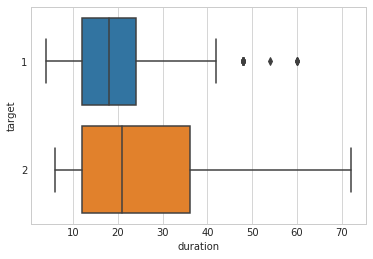

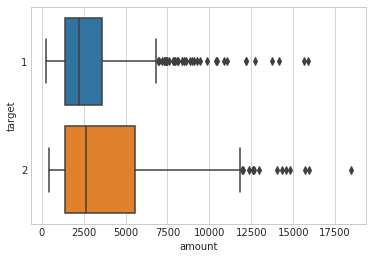

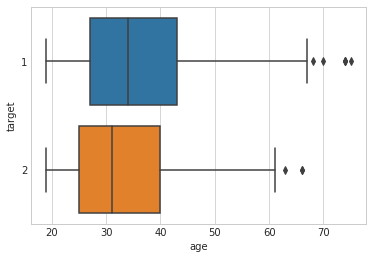

In [18]:
# X_train = treat_outliers(X_train, num_cols)
box_plot(X_train, y_train, num_cols)

### Small dataset so no outlier removal?

### 3. Encoding of categorical variables

In [20]:
def encode(df):
    return pd.get_dummies(df, drop_first=True)

In [21]:
X_train = encode(X_train)
X_test = encode(X_test)

In [46]:
def run_model(clf):
    global X_train, X_test, y_train, y_test
    clf = clf()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print (accuracy_score(y_test, y_pred))

In [47]:
for clf in [DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, GaussianNB]:
    print("======="+str(clf)+"=======")
    run_model(clf)

NameError: name 'GaussianNB' is not defined

### Feature Importance using Decision Tree

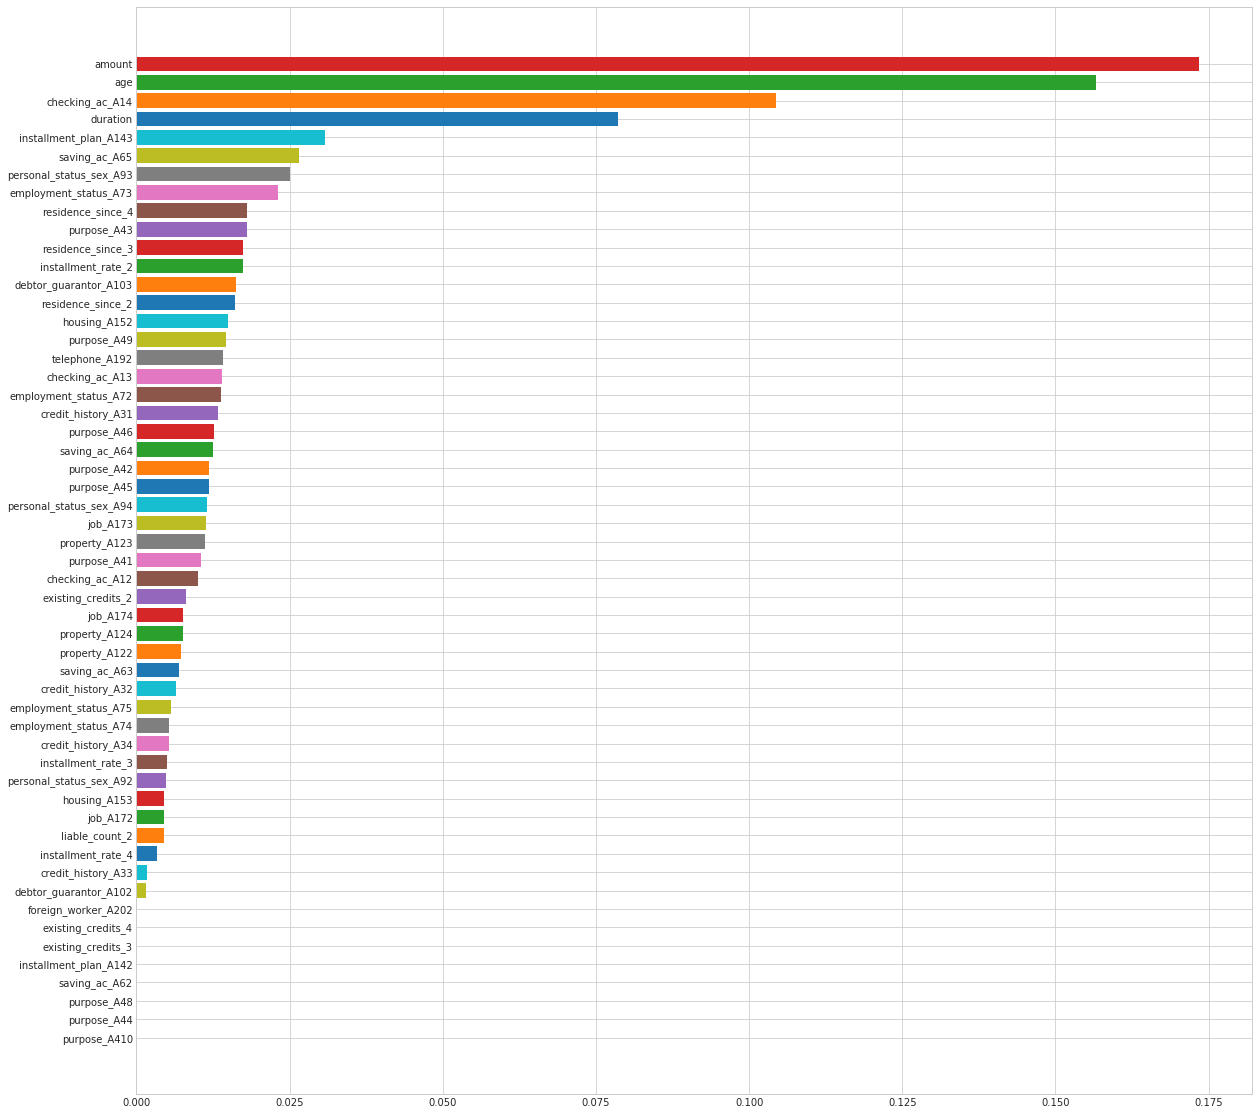

In [45]:
def plot_feature_imp(X_train, y_train, clf=DecisionTreeClassifier()):
    clf.fit(X_train, y_train)
    cols = X_train.columns
    vals = clf.feature_importances_ 

    temp_dict = {}
    for col, val in zip(cols, vals):
        temp_dict[col] = val
        
    plt.figure(figsize=(20,20))
    for k, v in sorted(temp_dict.items(), key=itemgetter(1)):
        plt.barh(k, v)
plot_feature_imp(X_train, y_train)

To Do:
4. hyperparameter tuning